## lab2 practice using pandas

In [1]:
!ls #check csv exist in the folder

home_data.csv  lab2-new.ipynb		   week2-predict-house-price.ipynb
home_data.gl   week2-calculate-rmse.ipynb


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
sales = pd.read_csv('home_data.csv')

In [4]:
sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
train_data, test_data = train_test_split(sales, test_size=0.2, random_state=0)

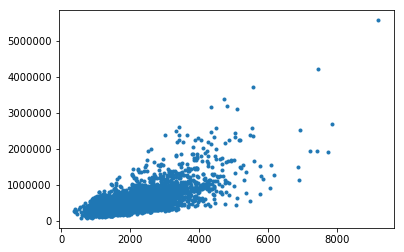

In [7]:
%matplotlib inline
plt.plot(test_data['sqft_living'], test_data['price'], '.')

In [8]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [9]:
train_data_sqft_living = train_data['sqft_living'].values.reshape(-1,1)
test_data_sqft_living = test_data['sqft_living'].values.reshape(-1,1)

In [10]:
sqft_model = lr.fit(train_data_sqft_living, train_data['price'])

In [11]:
predictions1 = sqft_model.predict(test_data_sqft_living)

In [12]:
predictions1

array([  357817.97358056,  1277876.09945262,   360657.65915424, ...,
         337940.17456481,   221513.06604396,   417451.37062782])

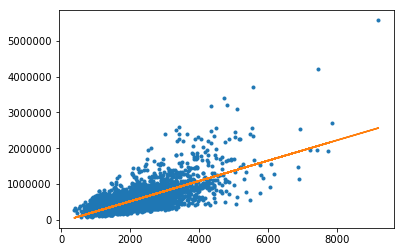

In [13]:
plt.plot(test_data['sqft_living'], test_data['price'], '.',
        test_data['sqft_living'],predictions1, '-' )

In [14]:
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(test_data['price'].values.reshape(-1,1),predictions1))

In [15]:
print rmse

248879.061436


In [16]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [24]:
#sales.where('id' == 5309101200)
house1 = sales[sales.id == 5309101200]

In [35]:
sqft_model.predict(house1['sqft_living'].values.reshape(-1,1))

array([ 633267.47422744])

In [44]:
train_data_selected = train_data[my_features]
train_data_selected

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
5268,3,1.00,1570,5510,1.0,98115
16909,3,2.50,1780,11000,1.0,98006
16123,3,1.50,1090,9862,1.0,98074
12181,4,2.50,2210,7079,2.0,98031
12617,3,2.50,1800,4763,2.0,98119
19024,4,2.00,3100,8000,1.5,98103
5063,4,3.75,5070,60123,2.0,98053
9888,1,1.00,1180,4000,1.5,98118
2774,3,2.50,1800,5372,2.0,98034
3197,4,1.75,3010,12523,1.0,98125


In [45]:
selected_model = lr.fit(train_data_selected, train_data['price'])